<a href="https://colab.research.google.com/github/kim1987/aiffel/blob/main/aiffel/exploration/ex_onefour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

exploration_14

전처리

In [1]:
from statsmodels.tsa.stattools import adfuller

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import osqppurepy
import warnings

warnings.filterwarnings(action='ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
  #ADF 그래프
    dftest = adfuller(timeseries, autolag='AIC')  
    
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [4]:
file_path = '/content/005930.KS.csv'
df = pd.read_csv(file_path, index_col='Date', parse_dates=True)
ts = df['Close']
ts=ts.interpolate(method='time')
ts.dropna(axis=0,inplace=True)
ts.head()

Date
2020-11-18    64800.0
2020-11-19    64600.0
2020-11-20    64700.0
2020-11-23    67500.0
2020-11-24    67700.0
Name: Close, dtype: float64

In [5]:
ts_log = np.log(ts)

In [6]:
def plot_rolling_statistics(timeseries, window=12):
    #평균과 분산 그래프
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

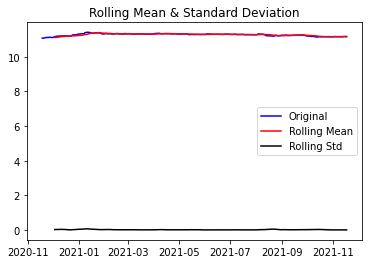

In [7]:
plot_rolling_statistics(ts_log, window=12)

In [8]:
augmented_dickey_fuller_test(ts_log)

Results of Dickey-Fuller Test:
Test Statistic                  -1.630093
p-value                          0.467442
#Lags Used                      12.000000
Number of Observations Used    234.000000
Critical Value (1%)             -3.458608
Critical Value (5%)             -2.873972
Critical Value (10%)            -2.573396
dtype: float64


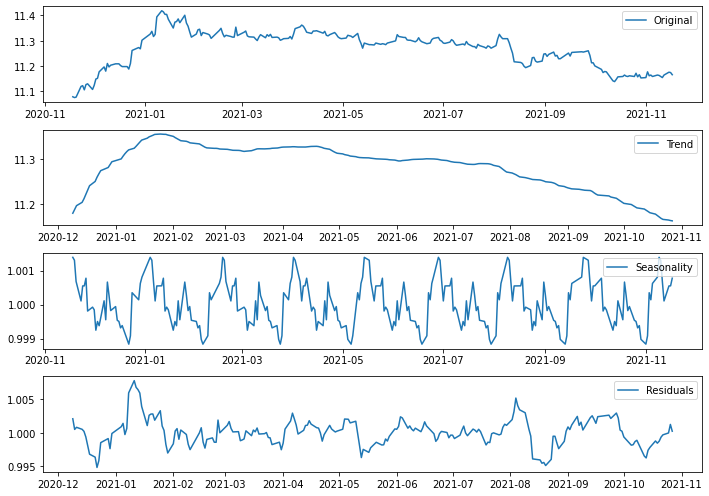

In [9]:
decomposition = seasonal_decompose(ts_log, model='multiplicative', freq = 30)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(10,7))
plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [10]:
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -6.305901e+00
p-value                        3.324239e-08
#Lags Used                     9.000000e+00
Number of Observations Used    2.070000e+02
Critical Value (1%)           -3.462342e+00
Critical Value (5%)           -2.875606e+00
Critical Value (10%)          -2.574267e+00
dtype: float64


학습,데이터셋

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_data,test_data = train_test_split(ts_log,train_size=0.9,shuffle=False)

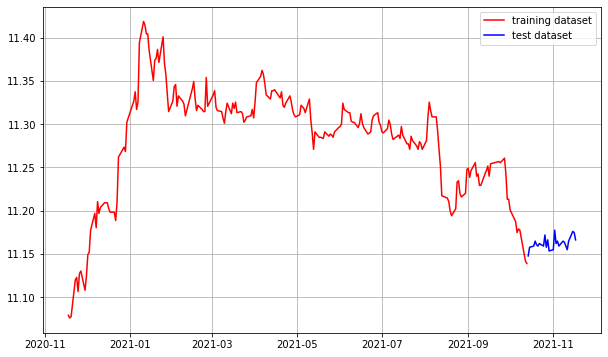

In [13]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(train_data, c='r', label='training dataset')
plt.plot(test_data, c='b', label='test dataset')
plt.legend()


Results of Dickey-Fuller Test:
Test Statistic                  -5.060851
p-value                          0.000017
#Lags Used                      11.000000
Number of Observations Used    234.000000
Critical Value (1%)             -3.458608
Critical Value (5%)             -2.873972
Critical Value (10%)            -2.573396
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.288182e+00
p-value                        1.440313e-10
#Lags Used                     1.400000e+01
Number of Observations Used    2.300000e+02
Critical Value (1%)           -3.459106e+00
Critical Value (5%)           -2.874190e+00
Critical Value (10%)          -2.573512e+00
dtype: float64


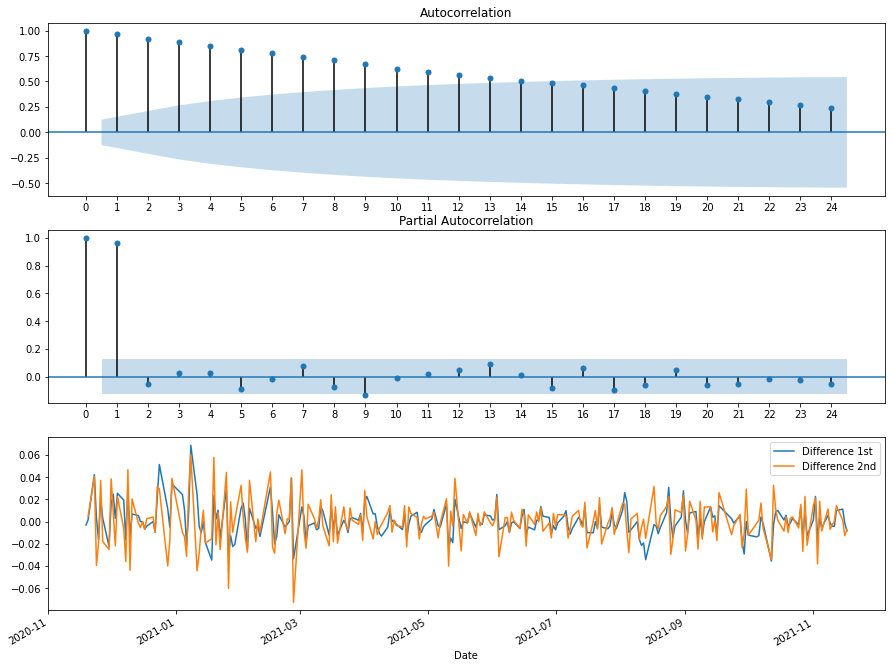

In [14]:
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(3,1,1)
ax.set_xticks(np.arange(0,25,1))
plot_acf(ts_log,ax=ax)

ax = fig.add_subplot(3,1,2)
ax.set_xticks(np.arange(0,25,1))
plot_pacf(ts_log,ax=ax)

ax = fig.add_subplot(3,1,3)
diff_1 = ts_log.diff(periods=1).iloc[1:]
diff_1.plot(label='Difference 1st')
ax.legend()
augmented_dickey_fuller_test(diff_1)

diff_2 = diff_1.diff(periods=1).iloc[1:]
diff_2.plot(label='Difference 2nd')
ax.legend()
augmented_dickey_fuller_test(diff_2)


fig.show()


ARIMA 모델 훈련 및 결과 with samsung


In [15]:
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  
print(fitted_m.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  221
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 620.232
Method:                       css-mle   S.D. of innovations              0.015
Date:                Wed, 17 Nov 2021   AIC                          -1234.464
Time:                        19:44:42   BIC                          -1224.270
Sample:                             1   HQIC                         -1230.348
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0003      0.001      0.253      0.800      -0.002       0.002
ar.L1.D.Close     0.0739      0.067      1.104      0.271      -0.057       0.205
                                    Root

In [16]:
fc, se, conf = fitted_m.forecast(len(test_data), alpha=0.05)

In [17]:
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)

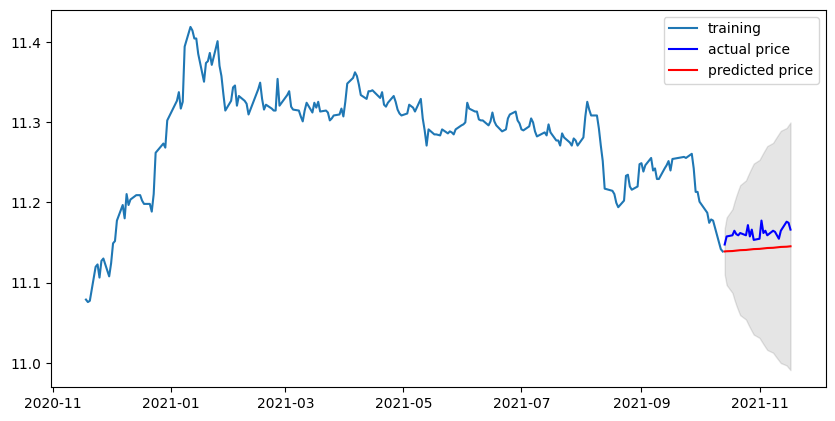

In [18]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [20]:
mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  2198252.8623455926
MAE:  1412.5633679208195
RMSE:  1482.6506204583711
MAPE: 2.00%


빠른 진행을 위한 함수 정의


In [21]:
def fast_split_set(file_path,fig):
  file_path = file_path
  df = pd.read_csv(file_path, index_col='Date', parse_dates=True)
  ts = df['Close']
  ts=ts.interpolate(method='time')
  ts.dropna(axis=0,inplace=True)
  ts_log = np.log(ts)

  fig = fig
  ax = fig.add_subplot(4,1,1)
  ax.set_xticks(np.arange(0,25,1))
  plot_acf(ts_log,ax=ax)

  ax = fig.add_subplot(4,1,2)
  ax.set_xticks(np.arange(0,25,1))
  plot_pacf(ts_log,ax=ax)

  ax = fig.add_subplot(4,1,3)
  diff_1 = ts_log.diff(periods=1).iloc[1:]
  diff_1.plot(label='Difference 1st')
  augmented_dickey_fuller_test(diff_1)

  diff_2 = diff_1.diff(periods=1).iloc[1:]
  diff_2.plot(label='Difference 2nd')
  augmented_dickey_fuller_test(diff_2)
  ax.set_title(label = 'diff')
  ax.xaxis.set_visible(False)
  fig.show()

  train_data,test_data = train_test_split(ts_log,train_size=0.9,shuffle=False)
  return train_data, test_data

In [22]:
def forecast_plot(model,train_data,test_data,fig):
  fc, se, conf = model.forecast(len(test_data), alpha=0.05)

  fc_series = pd.Series(fc, index=test_data.index)
  lower_series = pd.Series(conf[:, 0], index=test_data.index)
  upper_series = pd.Series(conf[:, 1], index=test_data.index)
  fig = fig
  ax = fig.add_subplot(4,1,4)
  ax.plot(train_data, label='training')
  ax.plot(test_data, c='b', label='actual price')
  ax.plot(fc_series, c='r',label='predicted price')
  ax.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
  ax.legend()
  ax.set_title(label='predict')
  fig.show()
  return fc,se,conf
  '''
  gs = gridspec.GridSpec(nrows=4,
                       ncols=1,
                       height_ratios=[1, 1, 1,1], 
                      )
  다음번에 gs사용해보기
  '''

In [23]:
def print_others(fc,se,conf,train_data,test_data):
  mse = mean_squared_error(np.exp(test_data), np.exp(fc))
  print('MSE: ', mse)

  mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
  print('MAE: ', mae)

  rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
  print('RMSE: ', rmse)

  mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
  print('MAPE: {:.2f}%'.format(mape*100))

In [24]:
def all_in_one(file_path,p,d,q):
  fig = plt.figure(figsize=(8,25),dpi=100)
  train_data, test_data = fast_split_set(file_path,fig)
  fitted_m = ARIMA(train_data, order=(1, 1, 0)).fit(disp=-1)
  fc,se,conf = forecast_plot(fitted_m,train_data,test_data,fig)
  print_others(fc,se,conf,train_data,test_data)

with NVIDIA

Results of Dickey-Fuller Test:
Test Statistic                -1.656976e+01
p-value                        1.874868e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.510000e+02
Critical Value (1%)           -3.456674e+00
Critical Value (5%)           -2.873125e+00
Critical Value (10%)          -2.572944e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -1.179429e+01
p-value                        9.661259e-22
#Lags Used                     5.000000e+00
Number of Observations Used    2.450000e+02
Critical Value (1%)           -3.457326e+00
Critical Value (5%)           -2.873410e+00
Critical Value (10%)          -2.573096e+00
dtype: float64


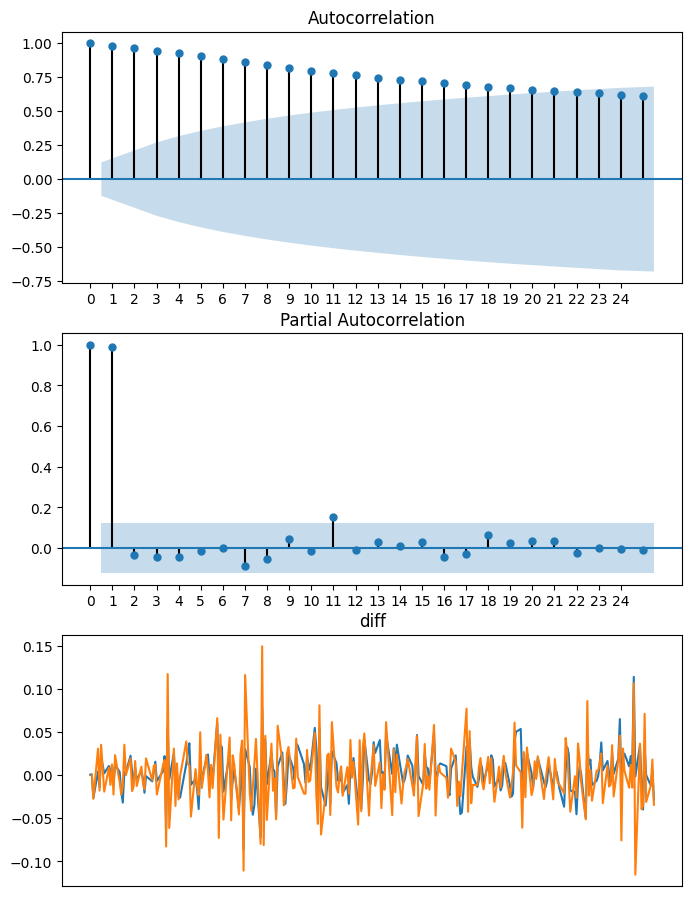

In [25]:
file_path = '/content/NVDA.csv'
fig =plt.figure(figsize=(8,17), dpi=100)
train_data, test_data = fast_split_set(file_path,fig)

In [26]:
model = ARIMA(train_data, order=(1, 1, 0))  
fitted_m = model.fit(disp=-1)  

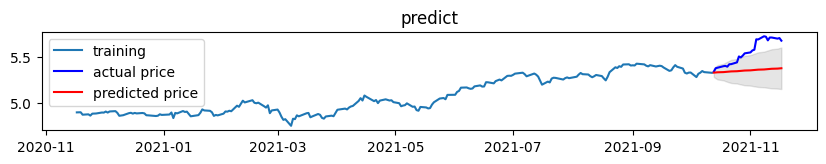

In [27]:
fig =plt.figure(figsize=(10,6), dpi=100)
fc,se,conf = forecast_plot(fitted_m,train_data,test_data,fig)

In [28]:
print_others(fc,se,conf,train_data,test_data)

MSE:  3397.20618865628
MAE:  49.01478640297981
RMSE:  58.28555729043242
MAPE: 17.48%


with TESLA

Results of Dickey-Fuller Test:
Test Statistic                -1.696168e+01
p-value                        9.298418e-30
#Lags Used                     0.000000e+00
Number of Observations Used    2.510000e+02
Critical Value (1%)           -3.456674e+00
Critical Value (5%)           -2.873125e+00
Critical Value (10%)          -2.572944e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.163755e+00
p-value                        2.922368e-10
#Lags Used                     1.400000e+01
Number of Observations Used    2.360000e+02
Critical Value (1%)           -3.458366e+00
Critical Value (5%)           -2.873866e+00
Critical Value (10%)          -2.573339e+00
dtype: float64
MSE:  51350.58872024046
MAE:  192.7771648578814
RMSE:  226.60668286756342
MAPE: 17.58%


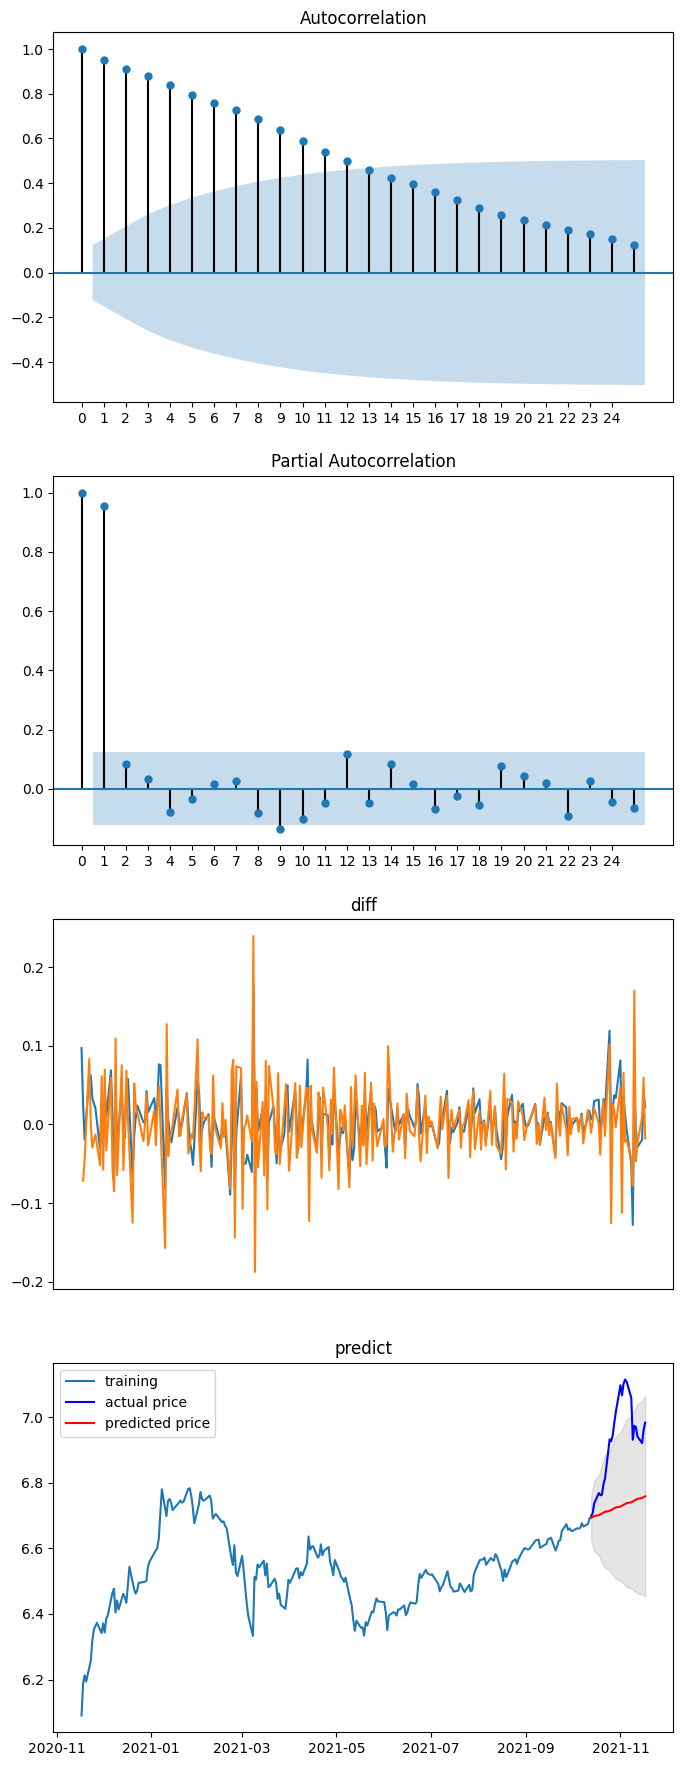

In [29]:
file_path='/content/TSLA.csv'
all_in_one(file_path,1,1,0)

with QUALCOM

Results of Dickey-Fuller Test:
Test Statistic                -1.535421e+01
p-value                        3.685417e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.510000e+02
Critical Value (1%)           -3.456674e+00
Critical Value (5%)           -2.873125e+00
Critical Value (10%)          -2.572944e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -8.897320e+00
p-value                        1.197165e-14
#Lags Used                     9.000000e+00
Number of Observations Used    2.410000e+02
Critical Value (1%)           -3.457779e+00
Critical Value (5%)           -2.873609e+00
Critical Value (10%)          -2.573202e+00
dtype: float64
MSE:  918.6889992035467
MAE:  23.92239643360187
RMSE:  30.309882863573502
MAPE: 15.18%


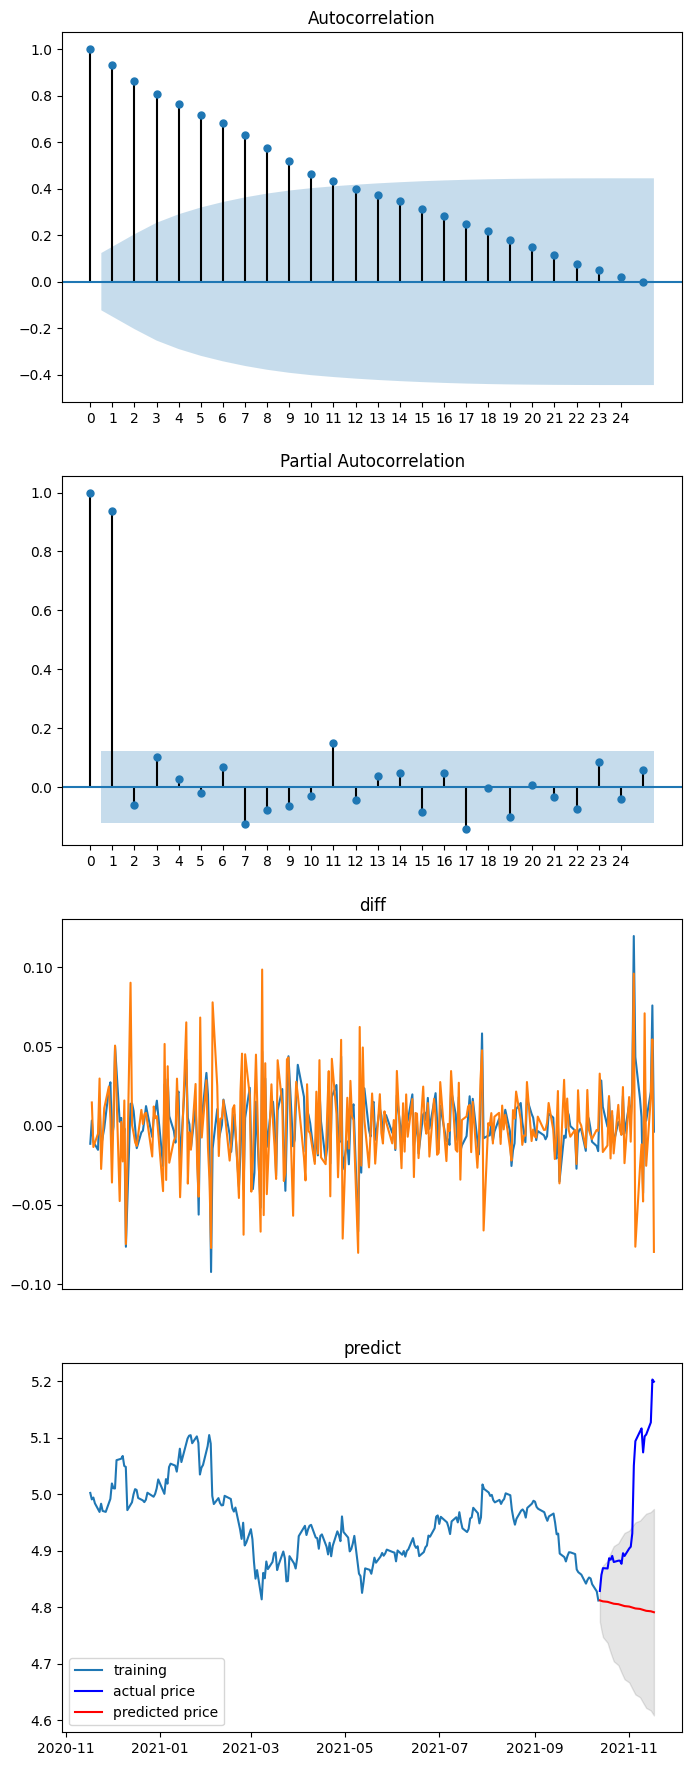

In [30]:
file_path='/content/QCOM.csv'
all_in_one(file_path,1,1,0)

with LG electronics

Results of Dickey-Fuller Test:
Test Statistic                -6.523006e+00
p-value                        1.030955e-08
#Lags Used                     6.000000e+00
Number of Observations Used    2.390000e+02
Critical Value (1%)           -3.458011e+00
Critical Value (5%)           -2.873710e+00
Critical Value (10%)          -2.573256e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -7.943430e+00
p-value                        3.267513e-12
#Lags Used                     1.600000e+01
Number of Observations Used    2.280000e+02
Critical Value (1%)           -3.459361e+00
Critical Value (5%)           -2.874302e+00
Critical Value (10%)          -2.573571e+00
dtype: float64
MSE:  11011980.702122211
MAE:  2864.8523751289595
RMSE:  3318.430457629361
MAPE: 2.34%


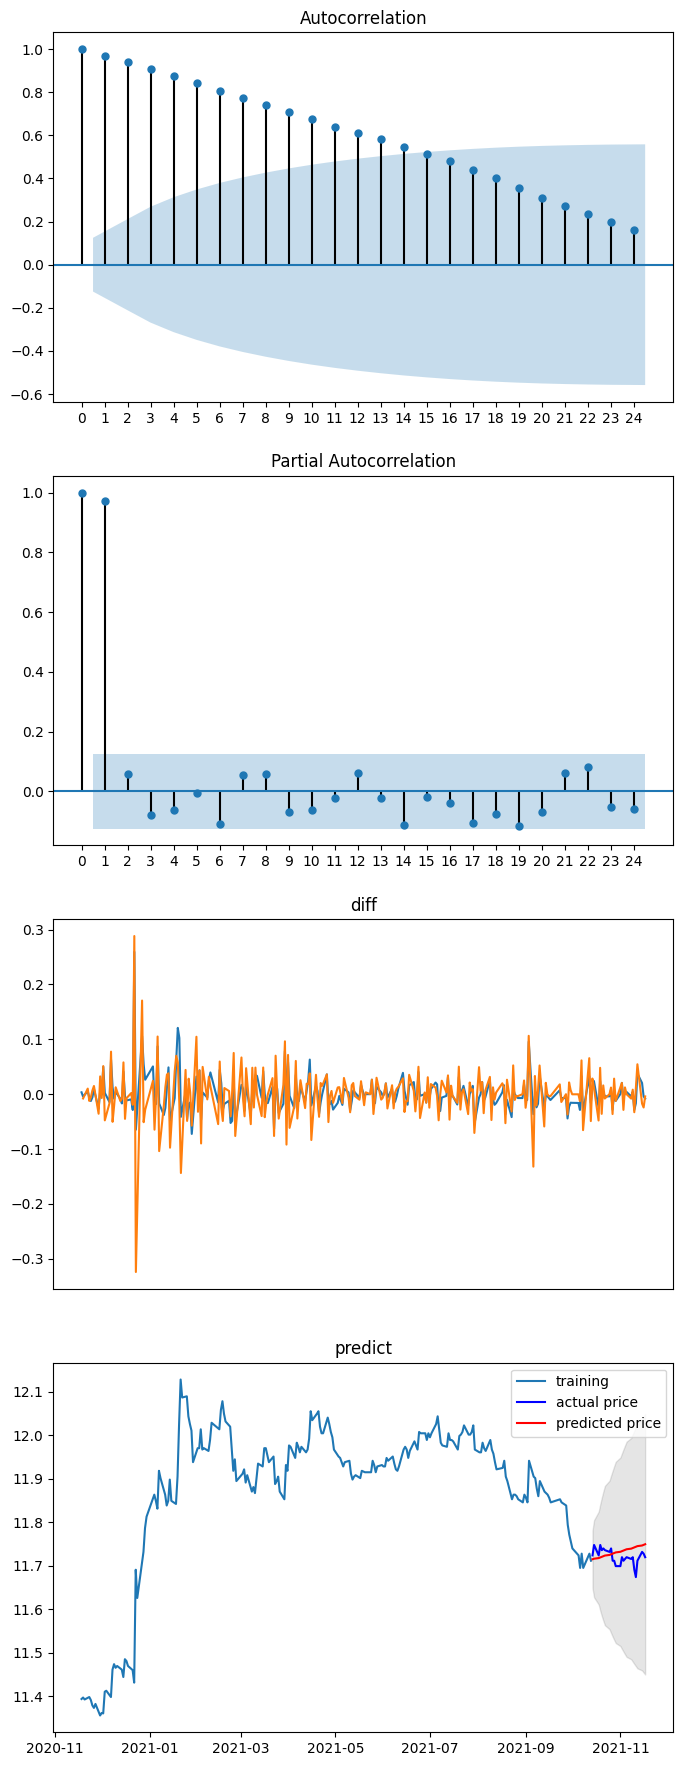

In [31]:
file_path = '/content/066570.KS.csv'
all_in_one(file_path,1,1,0)

with 강원랜드

Results of Dickey-Fuller Test:
Test Statistic                -1.062192e+01
p-value                        5.487572e-19
#Lags Used                     2.000000e+00
Number of Observations Used    2.430000e+02
Critical Value (1%)           -3.457551e+00
Critical Value (5%)           -2.873509e+00
Critical Value (10%)          -2.573148e+00
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                -9.599130e+00
p-value                        1.941854e-16
#Lags Used                     7.000000e+00
Number of Observations Used    2.370000e+02
Critical Value (1%)           -3.458247e+00
Critical Value (5%)           -2.873814e+00
Critical Value (10%)          -2.573311e+00
dtype: float64
MSE:  3566727.60887287
MAE:  1471.4378415156639
RMSE:  1888.5781977119375
MAPE: 5.49%


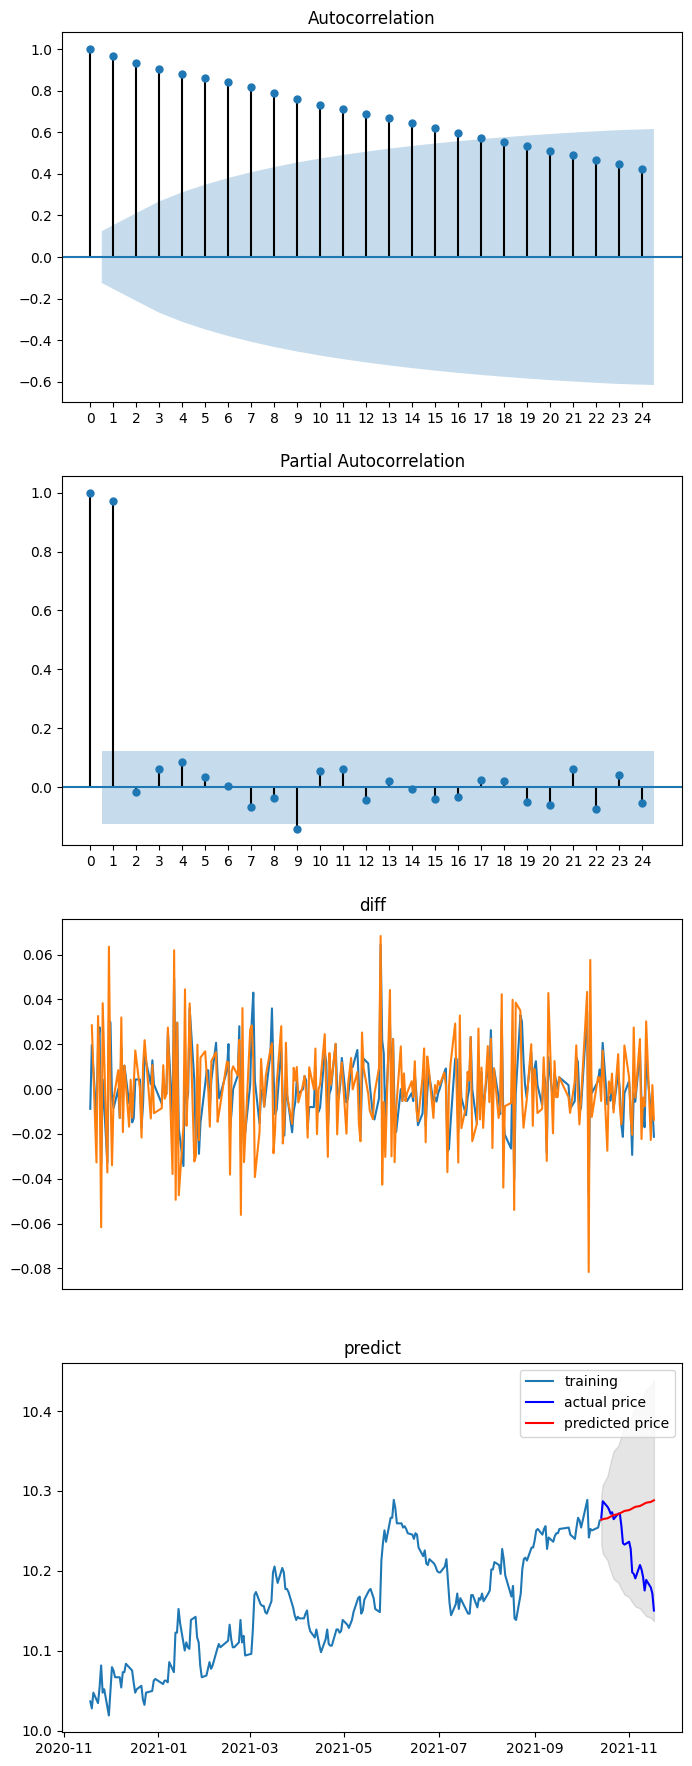

In [32]:
file_path = '/content/035250.KS.csv'
all_in_one(file_path,1,1,0)

결론 .차라리 추세선을 보자.